In [1]:
import numpy as np
import mylibrary.nnlib as tnn
import mylibrary.splinelib as tsp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib

matplotlib.rcParams['figure.figsize'] = (12, 8)

In [2]:
num_points = 50
X1 = np.linspace(-2.5, 1.5, num_points)
X2 = np.linspace(-2, 4, num_points)
X1, X2 = np.meshgrid(X1, X2)
X1 = X1.reshape(-1)
X2 = X2.reshape(-1)
Y = np.sin(np.sqrt(X1**2 + X2**2))*2-1.

%matplotlib tk
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

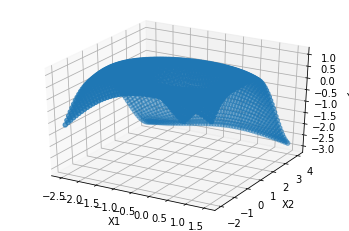

In [3]:
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

### Using Splines

In [8]:
xx = np.c_[X1, X2]
yy = Y.reshape(-1,1)
linear = tnn.WeightsLayer(2,2, optimizer=tnn.SGD(learning_rate=0.03))
splines = tsp.SplineMatrixLayer(2, 1, max_points=2)
splines._increase_pieces_(increase_by = 20)

In [9]:
%matplotlib tk

fig = plt.figure()
ax = fig.gca(projection='3d')

for epoch in range(100000):
    a1 = linear.forward(xx)
    yout = splines.forward(a1)
    dy = yout - yy
    da1 = splines.backward(dy)
    dx = linear.backward(da1)
    
    splines.update()
    linear.update()

    if epoch%100 == 0:
        splines._maintain_good_spline_()
    if epoch%100 == 0:
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear()
        
        ax.scatter(X1, X2, Y)
        ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('Y')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  0.9989008248009023


100 Error =  0.184449139190152


200 Error =  0.12316866357953023


300 Error =  0.11076880958304698


400 Error =  0.10576994781500434


500 Error =  0.10367660621765581


600 Error =  0.0943545403700994


700 Error =  0.09215710434839006


800 Error =  0.0886661733838151


900 Error =  0.08735487288933338


1000 Error =  0.08498257380144117


1100 Error =  0.08273544346535047


1200 Error =  0.0774003813424413


1300 Error =  0.06863327771046829


1400 Error =  0.06168513920486396


1500 Error =  0.059046311774428546


1600 Error =  0.05875658120673949


1700 Error =  0.05838495177059465


1800 Error =  0.05812656257191004


1900 Error =  0.05804938068705141


2000 Error =  0.05787127170225583


2100 Error =  0.05785177045134669


2200 Error =  0.05777949105224864


2300 Error =  0.05775856208728768


2400 Error =  0.05769703244790595


2500 Error =  0.058834281703966075


2600 Error =  0.05799460786060626


2700 Error =  0.057847548977881774


2800 Er



22400 Error =  0.05584697314564269


22500 Error =  0.05585807037072427


22600 Error =  0.05593217250385894


22700 Error =  0.05588159496522005


22800 Error =  0.05585528473010087


22900 Error =  0.05595317102654293


23000 Error =  0.055961470879983155


23100 Error =  0.05596301434579878


23200 Error =  0.055934247045462675


23300 Error =  0.06512230314332633


23400 Error =  0.0596698606138954


23500 Error =  0.05847237794964717


23600 Error =  0.05607419210203732


23700 Error =  0.05593636890843561


23800 Error =  0.055915942790518036


23900 Error =  0.055863448819635675


24000 Error =  0.05584063537360555


24100 Error =  0.05581244217230253


24200 Error =  0.055862684074445494


24300 Error =  0.05577153759907175


24400 Error =  0.05576297886720063


24500 Error =  0.055745036836770984


24600 Error =  0.05578551119407964


24700 Error =  0.057040927129239104


24800 Error =  0.056288266350460074


24900 Error =  0.05579483079062245


25000 Error =  0.055755932246

TclError: invalid command name "pyimage39"

In [16]:
splines._increase_pieces_(increase_by = 1)

In [10]:
%matplotlib tk
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

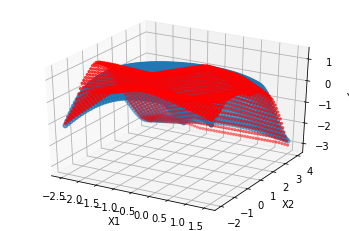

In [11]:
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

### Using Neural Network

In [12]:
%matplotlib tk

xx = np.c_[X1, X2]
yy = Y.reshape(-1,1)

n_hidden = 15
net = tnn.AutoForm(new_layers=True)
layer1 = tnn.NonLinearLayer(2, n_hidden, activation=tnn.Relu(), optimizer=tnn.Adam())
layer2 = tnn.LinearLayer(n_hidden, 1, optimizer=tnn.Adam())


fig = plt.figure()
ax = fig.gca(projection='3d')

for epoch in range(100000):
    yout = net.forward(xx)
    dy = yout - yy
#     print(dy.shape, yout.shape, yy.shape)
    dx = net.backward(dy)
    
    net.update()
    
    if epoch%100 == 0:
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear()
        
        ax.scatter(X1, X2, Y)
        ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('Y')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  2.1396823987121025


100 Error =  0.13485340552303765


200 Error =  0.08071702564478485


300 Error =  0.056700655500726546


400 Error =  0.039155594691613456


500 Error =  0.027577797600369092


600 Error =  0.022247482118493166


700 Error =  0.019529140790866203


800 Error =  0.017916430491877237


900 Error =  0.01678634735702332


1000 Error =  0.015991086847244006


1100 Error =  0.015389015417470498


1200 Error =  0.014969443010346771


1300 Error =  0.014608648431240386


1400 Error =  0.014357360798469386


1500 Error =  0.014146060950624144


1600 Error =  0.013955548154824682


1700 Error =  0.013766362756828755


1800 Error =  0.013584502410515554


1900 Error =  0.013374966149650358


2000 Error =  0.013437685492240132


2100 Error =  0.012861926931196194


2200 Error =  0.012570154778042407


2300 Error =  0.012377219117547139


2400 Error =  0.012125687203898604


2500 Error =  0.011843368906248958


2600 Error =  0.011141084393563337


2700 Error =  0.01



22000 Error =  0.009716810480887907


22100 Error =  0.010110830883011707


22200 Error =  0.009679896106607756


22300 Error =  0.00967982310352039


22400 Error =  0.009682142993800966


22500 Error =  0.00973309452004888


22600 Error =  0.009679276299720747


22700 Error =  0.009679583983906056


22800 Error =  0.009906129334252264


22900 Error =  0.009679222848130173


23000 Error =  0.009689846378933543


23100 Error =  0.00967925435567343


23200 Error =  0.009680078418303444


23300 Error =  0.009795281642751312


23400 Error =  0.009679460305840671


23500 Error =  0.009679489656021376


23600 Error =  0.009702683602537857


23700 Error =  0.00967936860077892


23800 Error =  0.00967992320538045


23900 Error =  0.009721532495643892


24000 Error =  0.010040728894852927


24100 Error =  0.009679201476709158


24200 Error =  0.009679267013668943


24300 Error =  0.009679208559685275


24400 Error =  0.009682574034221696


24500 Error =  0.009776295028072682


24600 Error =  

TclError: invalid command name "pyimage58"

In [13]:
%matplotlib tk
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

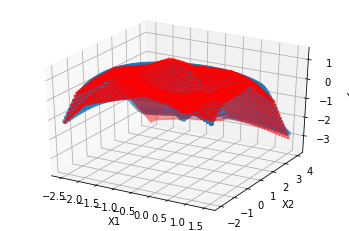

In [13]:
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

### Using Spline Matrix

In [18]:
%matplotlib tk
xx = np.c_[X1, X2]
yy = Y.reshape(-1,1)
max_points = 5
layer1 = tsp.SplineMatrixLayer(2, 2, max_points=2)
layer2 = tsp.SplineMatrixLayer(2, 1, max_points=2)

layer1._increase_pieces_(increase_by = max_points-2)
layer2._increase_pieces_(increase_by = max_points-2)

fig = plt.figure()
ax = fig.gca(projection='3d')

for epoch in range(100000):
    a1 = layer1.forward(xx)
    yout = layer2.forward(a1)
    dy = yout - yy
    da1 = layer2.backward(dy)
    dx = layer1.backward(da1)
    
    layer1.update()
    layer2.update()
    
    if epoch%100 == 0:
        layer1._maintain_good_spline_()
        layer2._maintain_good_spline_()
    
    if epoch%100 == 0:
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear()
        
        ax.scatter(X1, X2, Y)
        ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('Y')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  1.947403890421161


100 Error =  0.13172187847860123


200 Error =  0.10213738104478676


300 Error =  0.07472356807925187


400 Error =  0.06811179808633565


500 Error =  0.06351403130632999


600 Error =  0.059964193973280705


700 Error =  0.0569557407536846


800 Error =  0.05460708186064918


900 Error =  0.052968460343624055


1000 Error =  0.05162716699779558


1100 Error =  0.050556872014798866


1200 Error =  0.049551768715306296


1300 Error =  0.0486052156464793


1400 Error =  0.047488196018586115


1500 Error =  0.046395114869465535


1600 Error =  0.045885860405237566


1700 Error =  0.04514786576869106


1800 Error =  0.04427987580943797


1900 Error =  0.04343267474762441


2000 Error =  0.042796036310693446


TclError: invalid command name "pyimage137"

In [19]:
%matplotlib tk
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

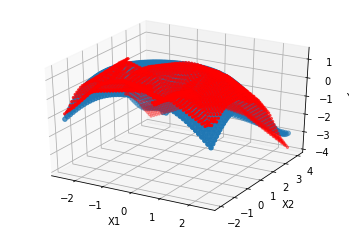

In [20]:
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

### Resudual Spline Vector Layer

In [33]:
%matplotlib tk
xx = np.c_[X1, X2]
yy = Y.reshape(-1,1)
max_points = 7

layer1 = tnn.WeightsLayer(2, 2, optimizer=tnn.SGD(0.1))
layer2 = tsp.SplineVectorLayer(2, max_points=2)
layer3 = tnn.WeightsLayer(2, 2, optimizer=tnn.SGD(0.1))
layer4 = tsp.SplineVectorLayer(2, max_points=2)
layer5 = tnn.LinearLayer(2, 1, optimizer=tnn.SGD(0.1))

layer2._increase_pieces_(increase_by = max_points-2)
layer4._increase_pieces_(increase_by = max_points-2)

fig = plt.figure()
ax = fig.gca(projection='3d')

for epoch in range(100000):
    a1 = layer1.forward(xx)#+xx
    a2 = layer2.forward(a1)#+xx
    a3 = layer3.forward(a2)#+xx
    a4 = layer4.forward(a3)#+xx
    a5 = layer5.forward(a4)
    
    yout = a5
    dy = yout - yy
    da5 = dy
    
    da4 = layer5.backward(da5)
    da3 = layer4.backward(da4)
    da2 = layer3.backward(da3)
    da1 = layer2.backward(da2)
    dx = layer1.backward(da1)#+da1+da2+da3+da4
    
    layer1.update()
    layer2.update()
    layer3.update()
    layer4.update()
    layer5.update()
    
    
    if epoch%100 == 0:
        layer2._maintain_good_spline_()
        layer4._maintain_good_spline_()
    
    if epoch%100 == 0:
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear()
        
        ax.scatter(X1, X2, Y)
        ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('Y')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  1.278849785918937


100 Error =  0.1989816356979415


200 Error =  0.12240089621722361


300 Error =  0.09440064117060425


400 Error =  0.08831326184073005


500 Error =  0.07807223763401117


600 Error =  0.05398944195100696


700 Error =  0.04772194224650432


800 Error =  0.05032597173092573


900 Error =  0.04831541397550916


1000 Error =  0.04259875619695787


1100 Error =  0.04257201734304125


1200 Error =  0.04098189970031485


1300 Error =  0.05114152495410144


1400 Error =  0.046503978837578515


1500 Error =  0.038655437773853066


1600 Error =  0.03826321192877084


1700 Error =  0.04000307941956579


1800 Error =  0.03589109958528065


1900 Error =  0.037945748043270694


2000 Error =  0.03536073193013802


2100 Error =  0.03497677065180433


2200 Error =  0.0330011693241559


2300 Error =  0.02867819556532334


2400 Error =  0.031599330166734815


2500 Error =  0.03097434139749081


2600 Error =  0.028684296011004858


2700 Error =  0.028792950047017735


28

TclError: invalid command name "pyimage246"

In [34]:
%matplotlib tk
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

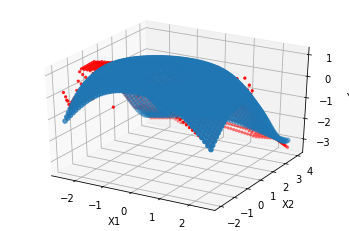

In [35]:
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()